Game Of Thrones Dizisinin Data Analizi incelemeye çalıştım.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Öncelikle bizlere gerekli olabilecek kütüphanelerimizi import ettik.

In [3]:
battles = pd.read_csv("battles.csv")
deaths = pd.read_csv("character-deaths.csv")
predictions = pd.read_csv("character-predictions.csv")


İncelemek istediğimiz verimizin csv formatında hazırlanmış dosyalarını pandas kütüphanesi yardımı ile okuttuk.

In [4]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


Savaşlar ile ilgili verimizin ilk beş sütununu inceledik.

In [5]:
deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


Ölümler ile ilgili verimizin ilk beş sütununu inceledik.

In [8]:
battles.tail()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
33,Second Seige of Storm's End,300,34,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,...,0.0,0.0,NaN,200.0,"Mace Tyrell, Mathis Rowan",Gilbert Farring,0.0,Storm's End,The Stormlands,NaN
34,Siege of Dragonstone,300,35,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,...,0.0,0.0,2000.0,NaN,"Loras Tyrell, Raxter Redwyne",Rolland Storm,0.0,Dragonstone,The Stormlands,NaN
35,Siege of Riverrun,300,36,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Frey,NaN,NaN,Tully,...,0.0,0.0,3000.0,NaN,"Daven Lannister, Ryman Fey, Jaime Lannister",Brynden Tully,0.0,Riverrun,The Riverlands,NaN
36,Siege of Raventree,300,37,Joffrey/Tommen Baratheon,Robb Stark,Bracken,Lannister,NaN,NaN,Blackwood,...,0.0,1.0,1500.0,NaN,"Jonos Bracken, Jaime Lannister",Tytos Blackwood,0.0,Raventree,The Riverlands,NaN
37,Siege of Winterfell,300,38,Stannis Baratheon,Joffrey/Tommen Baratheon,Baratheon,Karstark,Mormont,Glover,Bolton,...,NaN,NaN,5000.0,8000.0,Stannis Baratheon,Roose Bolton,0.0,Winterfell,The North,NaN


Savaşlar ile ilgili verimizin son beş sütununu inceledik.

In [9]:
deaths.tail()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0
916,Talbert Serry,Tyrell,300.0,4.0,29.0,29.0,1,1,0,0,0,1,0


Ölümler ile ilgili verimizin son beş sütununu inceledik.

In [10]:
battles.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

Savaşlar ile ilgili verimizin sütun adlarını listeledik.

In [11]:
deaths.columns

Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object')

Ölümler ile ilgili verimizin sütun adlarını listeledik.

In [13]:
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

Savaşlar verimiz ile ilgili genel bilgi sordurma işlemini gerçekleştirdik.

In [22]:
chosen_columns_battles =['name', 'year', 'battle_number', 'attacker_king', 'defender_king','attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region']
df_battles = pd.DataFrame(battles, columns = chosen_columns_battles)
df_battles.set_index('name', inplace=True)
df_battles.head()

,year,battle_number,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region
name,,,,,,,,,,,,,,,
Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands
Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands
Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands
Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands
Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands


Savaşlar verimizin kullanmak istediğimiz sütunlarını seçtik ve Dataframe'mizi oluşturduk.Sonra name sütunumuzu ayarlanmış dizin yaptık.

In [33]:
df_battles['attacker_king'].value_counts().head()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

Oluşturduğumuz dataframemizde en çok saldırı yapmış kralların ilk beş tanesini listelettirdik.

In [35]:
df_battles['defender_king'].value_counts().head()

Robb Stark                  14
Joffrey/Tommen Baratheon    13
Balon/Euron Greyjoy          4
Stannis Baratheon            2
Renly Baratheon              1
Name: defender_king, dtype: int64

Oluşturduğumuz dataframemizde en çok savunma yapmış kralların ilk beş tanesini listelettirdik.

In [25]:
df_battles['battle_type'].value_counts().head()

pitched battle    14
siege             11
ambush            10
razing             2
Name: battle_type, dtype: int64

Oluşturduğumuz dataframemizde en çok kullanıla savaş türünü ilk beş tanesini listelettirdik.

In [26]:
df_battles['attacker_commander'].value_counts().head()

Gregor Clegane                                                                   4
Robb Stark, Brynden Tully                                                        2
Theon Greyjoy                                                                    2
Euron Greyjoy, Victarion Greyjoy                                                 2
Roose Bolton, Wylis Manderly, Medger Cerwyn, Harrion Karstark, Halys Hornwood    1
Name: attacker_commander, dtype: int64

Oluşturduğumuz dataframemizde en çok saldırı yapmış kumandanların ilk beş tanesini listelettirdik.

In [27]:
df_battles['defender_commander'].value_counts().head()

Robb Stark                                                                                                       1
Lord Andros Brax, Forley Prester                                                                                 1
Stafford Lannister, Roland Crakehall, Antario Jast                                                               1
Tyrion Lannister, Jacelyn Bywater, Sandor Clegane, Tywin Lannister, Garlan Tyrell, Mace Tyrell, Randyll Tarly    1
Randyll Tarly, Gregor Clegane                                                                                    1
Name: defender_commander, dtype: int64

Oluşturduğumuz dataframemizde en çok savunma yapmış kumandanların ilk beş tanesini listelettirdik.

In [28]:
df_battles['summer'].value_counts().head() 

1.0    26
0.0    11
Name: summer, dtype: int64

Oluşturduğumuz dataframemizde savaşların hangi mevsimde kaç tane yapıldıkların listelettirdik.1 yazı 0 kışı temsil ediyor.

In [29]:
df_battles['location'].value_counts().head()

Winterfell        3
Riverrun          3
Deepwood Motte    2
Harrenhal         2
Storm's End       2
Name: location, dtype: int64

Oluşturduğumuz dataframemizde en çok savaş yapılmış yerlerin ilk beş tanesini listelettirdik.

In [30]:
df_battles['region'].value_counts().head()

The Riverlands     17
The North          10
The Stormlands      3
The Westerlands     3
The Crownlands      2
Name: region, dtype: int64

Oluşturduğumuz dataframemizde en çok savaş yapılmış bölgelerin ilk beş tanesini listelettirdik.

In [31]:
df_battles['attacker_size'].value_counts().head()

6000.0     3
5000.0     2
3000.0     2
15000.0    2
4500.0     1
Name: attacker_size, dtype: int64

Oluşturduğumuz dataframemizde saldırıların kaç kişilik boyutlarla kaç defa yapıldığını yapıldığını listelettirdik.

In [32]:
df_battles['defender_size'].value_counts().head()

10000.0    3
200.0      2
6000.0     2
20000.0    2
7250.0     1
Name: defender_size, dtype: int64

Oluşturduğumuz dataframemizde savunmaların kaç kişilik boyutlarla kaç defa yapıldığını yapıldığını listelettirdik.

In [14]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
Name                  917 non-null object
Allegiances           917 non-null object
Death Year            305 non-null float64
Book of Death         307 non-null float64
Death Chapter         299 non-null float64
Book Intro Chapter    905 non-null float64
Gender                917 non-null int64
Nobility              917 non-null int64
GoT                   917 non-null int64
CoK                   917 non-null int64
SoS                   917 non-null int64
FfC                   917 non-null int64
DwD                   917 non-null int64
dtypes: float64(4), int64(7), object(2)
memory usage: 93.2+ KB


In [18]:
chosen_columns_deaths =['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD']
df_deaths = pd.DataFrame(deaths, columns = chosen_columns_deaths)
df_deaths.set_index('Name', inplace=True)
df_deaths.head()


,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
Name,,,,,,,,,,,,
Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [5]:
battles.describe()


,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [6]:
deaths.describe()

,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
count,305.000000,307.000000,299.000000,905.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,299.157377,2.928339,40.070234,28.861878,0.828790,0.468920,0.272628,0.353326,0.424209,0.272628,0.284624
std,0.703483,1.326482,20.470270,20.165788,0.376898,0.499305,0.445554,0.478264,0.494492,0.445554,0.451481
min,297.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,299.000000,2.000000,25.500000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,299.000000,3.000000,39.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,300.000000,4.000000,57.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,300.000000,5.000000,80.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
predictions.describe()

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,...,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,...,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,...,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


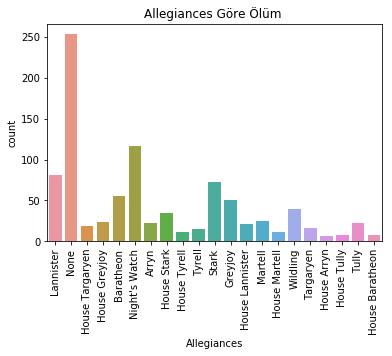

In [11]:
sns.countplot(deaths['Allegiances'])
plt.xticks(Rotation = 90)
plt.title('Allegiances Göre Ölüm ')
plt.show()

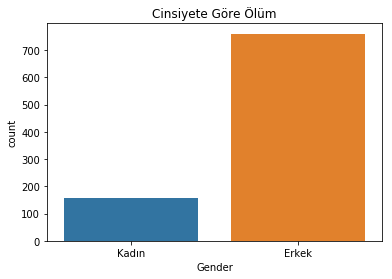

In [12]:
sns.countplot(deaths['Gender'])
plt.title('Cinsiyete Göre Ölüm')
plt.xticks(np.arange(2),('Kadın','Erkek'))
plt.show()

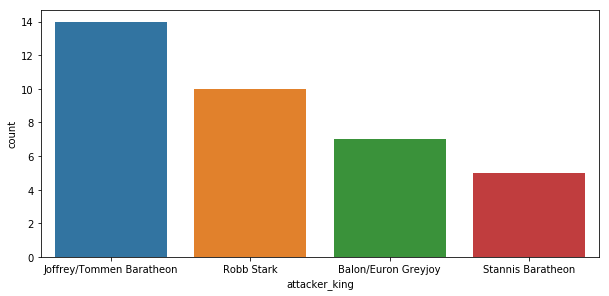

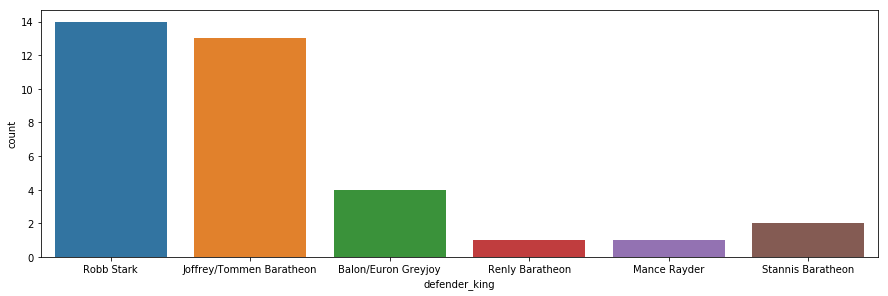

In [16]:
plt.figure(figsize=(10,10))
plt.title('Saldırı Krallar')
plt.subplot(2,1,1)
sns.countplot(x='attacker_king',data = battles)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sns.countplot(x='defender_king',data = battles)
plt.show()

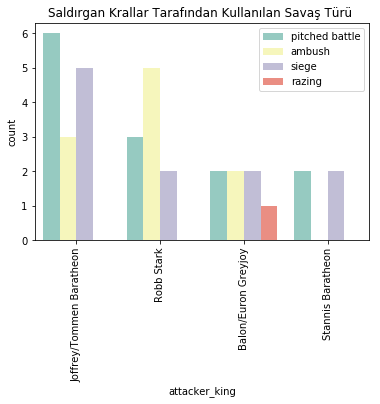

In [17]:
sns.countplot(hue= battles['battle_type'],x=battles['attacker_king'],palette = 'Set3')
plt.title('Saldırgan Krallar Tarafından Kullanılan Savaş Türü ')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 90)
plt.show()

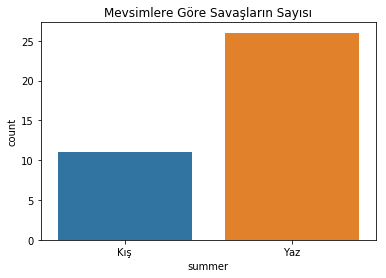

In [20]:
sns.countplot(x='summer',data = battles)
plt.title('Mevsimlere Göre Savaşların Sayısı')
plt.xticks(np.arange(2),('Kış','Yaz'))
plt.show()

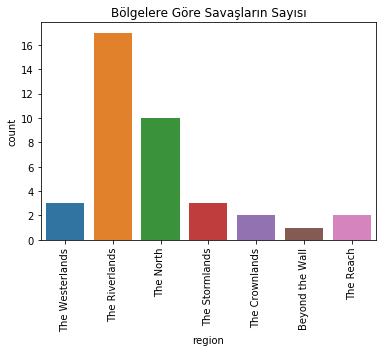

In [21]:
sns.countplot(x='region', data = battles)
plt.title('Bölgelere Göre Savaşların Sayısı')
plt.xticks(rotation = 90)
plt.show()

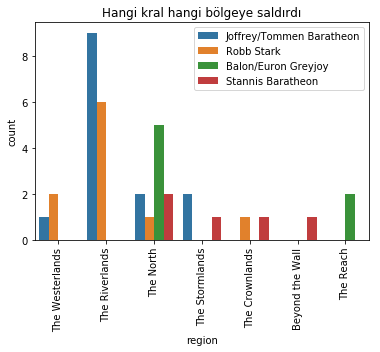

In [22]:
sns.countplot(x='region',hue='attacker_king', data = battles)
plt.title('Hangi kral hangi bölgeye saldırdı')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

In [23]:
deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


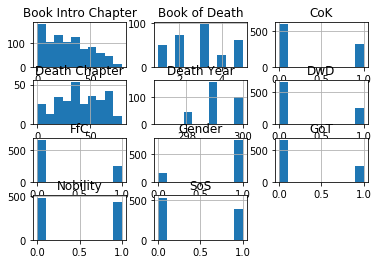

In [25]:
deaths.hist()
plt.show()

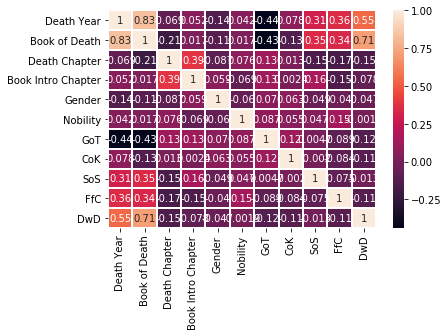

In [27]:
co = deaths.corr()
sns.heatmap(co, annot=True, linewidths=1.0)

In [28]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


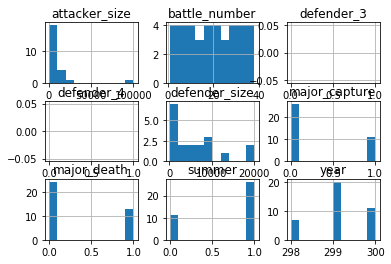

In [29]:
battles.hist()
plt.show()

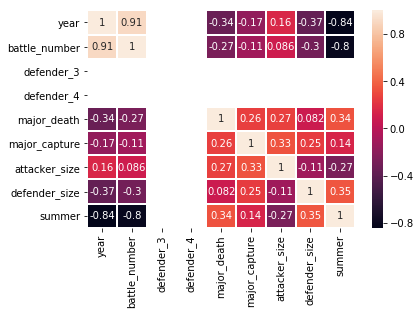

In [30]:
co = battles.corr()
sns.heatmap(co, annot=True, linewidths=1.0)

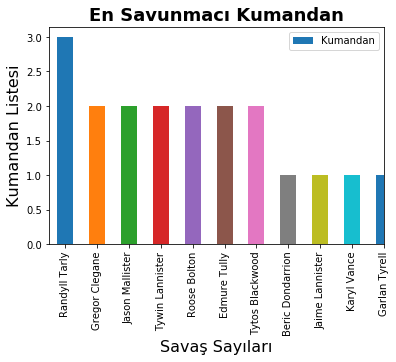

In [38]:
most_pop_genres = battles['defender_commander'].str.cat(sep=', ').split(', ')
most_pop_genres = pd.Series(most_pop_genres).value_counts(ascending=False) 
graph = most_pop_genres.plot.bar()
graph.set_title("En Savunmacı Kumandan", fontsize=18, fontweight='bold')
graph.set_xlabel("Savaş Sayıları", fontsize=16)
graph.set_ylabel("Kumandan Listesi", fontsize=16)
graph.set_xlim(right=10)
graph.legend(['Kumandan'], loc = "upper right")

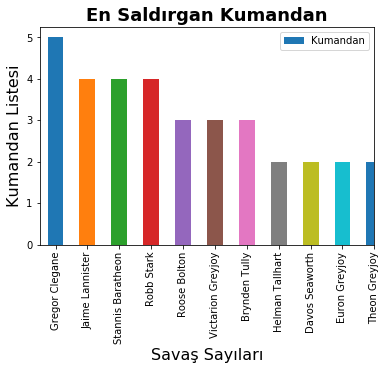

In [39]:
most_pop_genres = battles['attacker_commander'].str.cat(sep=', ').split(', ')
most_pop_genres = pd.Series(most_pop_genres).value_counts(ascending=False) 
graph = most_pop_genres.plot.bar()
graph.set_title("En Saldırgan Kumandan", fontsize=18, fontweight='bold')
graph.set_xlabel("Savaş Sayıları", fontsize=16)
graph.set_ylabel("Kumandan Listesi", fontsize=16)
graph.set_xlim(right=10)
graph.legend(['Kumandan'], loc = "upper right")